In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [36]:
df=pd.read_csv("Iris_data.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
df.shape

(150, 6)

In [39]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [40]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [41]:
df["Sepal_Length"]=df.SepalLengthCm
df["Sepal_Width"]=df.SepalWidthCm
df["Petal_Length"]=df.PetalLengthCm
df["Petal_Width"]=df.PetalWidthCm
df_final=df.drop(["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],axis='columns')
df_final.head()

,Species,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,Iris-setosa,5.1,3.5,1.4,0.2
1,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.7,3.2,1.3,0.2
3,Iris-setosa,4.6,3.1,1.5,0.2
4,Iris-setosa,5.0,3.6,1.4,0.2


In [42]:
df1=df[df_final["Species"]=="Iris-setosa"]
df2=df[df_final["Species"]=="Iris-versicolor"]
df3=df[df_final["Species"]=="Iris-virginica"]

In [43]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(df.drop(["Species"],axis=1))

MinMaxScaler()

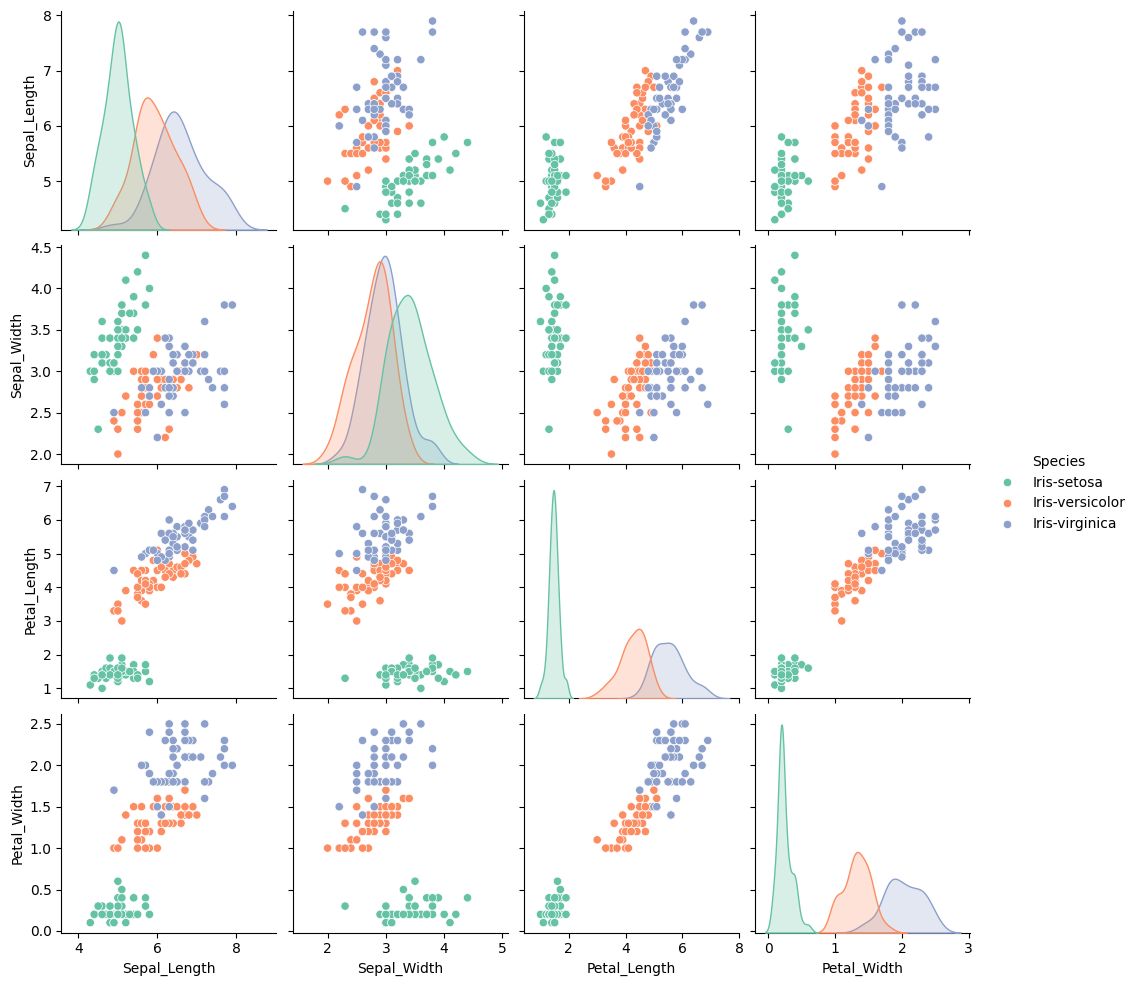

In [44]:
sns.pairplot(df_final ,hue="Species",palette='Set2')

In [45]:
x=df_final.drop(["Species"],axis=1)
y=df.Species

<Axes: >

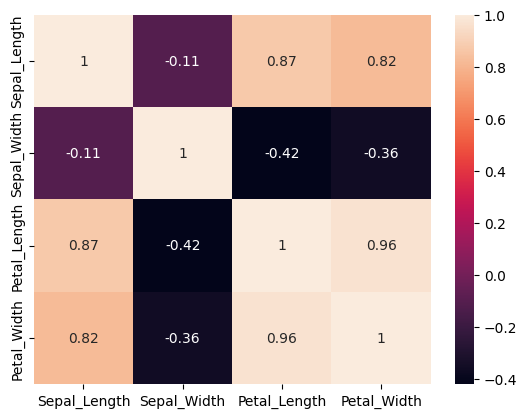

In [46]:
cor=x.corr()
sns.heatmap(cor,annot=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_final["Species"]=le.fit_transform(df_final["Species"])
df_final

,Species,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


In [48]:
x=df_final.drop(["Species"],axis=1)
y=df_final.Species
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [51]:
clf_log=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions={"C":[1,10,20,30],"penalty":["l1","l2"],'solver': ['liblinear', 'saga']},cv=5,n_iter=50,random_state=100)
model_log=clf_log.fit(x,y)
para_log=model_log.best_params_
score_log=round(model_log.best_score_,3)
r=print(f'Best parameters={para_log}, Best Score={score_log}')
r
results_log=pd.DataFrame(model_log.cv_results_)

Best parameters={'solver': 'saga', 'penalty': 'l1', 'C': 1}, Best Score=0.987


In [52]:
clf_SVC=RandomizedSearchCV(estimator=SVC(),param_distributions={"C":[1,10,20,30,40.50],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},cv=5,n_iter=50,random_state=100)
model_SVC=clf_SVC.fit(x,y)
para_SVC=model_SVC.best_params_
score_SVC=round(model_SVC.best_score_,3)
r=print(f'Best parameters={para_SVC}, Best Score={score_SVC}')
r
results_SVC=pd.DataFrame(model_SVC.cv_results_)

Best parameters={'kernel': 'linear', 'C': 1}, Best Score=0.98


In [53]:
clf_DT=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions={'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10, 20, 30]},cv=5,n_iter=200,random_state=10)
model_DT=clf_DT.fit(x,y)
para_DT=model_DT.best_params_
score_DT=round(model_DT.best_score_,3)
r= print(f'Best parameters={para_DT}, Best Score={score_DT}')
r
results_DT=pd.DataFrame(model_DT.cv_results_)


Best parameters={'max_depth': 5, 'criterion': 'gini'}, Best Score=0.967


In [54]:
clf_RF=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions={'n_estimators': [1,5,10,20],'max_depth': [None, 5, 10, 20, 30],},cv=5,n_iter=200,random_state=10)
model_RF=clf_RF.fit(x,y)
para_RF=model_RF.best_params_
score_RF=round(model_DT.best_score_,3)
r=print(f'Best parameters={para_RF}, Best Score={score_RF}')
r
results_RF=pd.DataFrame(model_RF.cv_results_)

Best parameters={'n_estimators': 5, 'max_depth': 5}, Best Score=0.967


In [55]:
model=["LogisticRegression","SCV","Decision Tree","Random Forest"]
parameter=[para_log,para_SVC,para_DT,para_RF,]
Best_Score=[score_log,score_SVC,score_DT,score_RF]

d={"Model":model,"Best Parameter":parameter,"Best Score":Best_Score}

Model_eval=pd.DataFrame(d)
Model_eval

,Model,Best Parameter,Best Score
0,LogisticRegression,"{'solver': 'saga', 'penalty': 'l1', 'C': 1}",0.987
1,SCV,"{'kernel': 'linear', 'C': 1}",0.980
2,Decision Tree,"{'max_depth': 5, 'criterion': 'gini'}",0.967
3,Random Forest,"{'n_estimators': 5, 'max_depth': 5}",0.967


In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=20)

final_model=LogisticRegression(solver="saga", penalty="l1", C=1)
final_model.fit(X_train,Y_train)
Y_pred=final_model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,accuracy_score
Final_score=round(accuracy_score(Y_pred,Y_test),4)
print(f'The accuracy of the model is {Final_score*100}%')

The accuracy of the model is 97.37%


Text(50.722222222222214, 0.5, 'Actual')

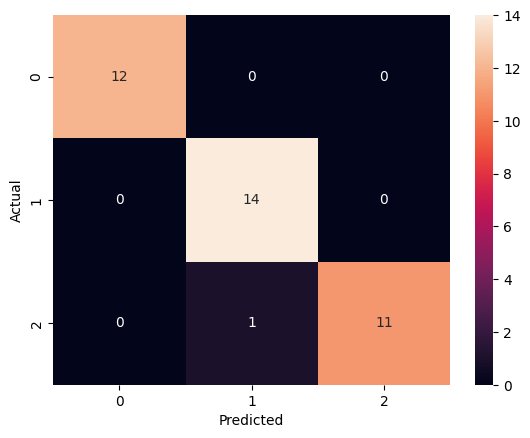

In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [59]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

